In [91]:
# import library necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

%matplotlib inline


In [41]:
df = pd.read_csv('all_albums.csv')

In [44]:
df.head(2)

,Year,Album,Song,Text
0,1997,"Greatest Lovesongs, Vol. 666",For You,"['In the grace of your love I writhe in pain',..."
1,1997,"Greatest Lovesongs, Vol. 666",Your Sweet Six Six Six,"['There are things you should know', 'And the ..."


In [45]:
# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(df['Text'])

In [95]:
# function for finding most significant words for each album
def generate_text(album):
    
    df_s = df['Text']
    y = df['Album'].map(lambda x: 1 if x == album else 0)
    count = len(df_s)
    
    tfidf = TfidfVectorizer(stop_words = 'english')
    X = tfidf.fit_transform(df_s)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
    clf_d = DummyClassifier().fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    acc_d = clf_d.score(X_test, y_test)
    coef = clf.coef_.tolist()[0]
    w = tfidf.get_feature_names()
    coeff_df = pd.DataFrame({'words' : w, 'score' : coef})
    coeff_df = coeff_df.sort_values(['score', 'words'], ascending=[0, 1])
    coeff_df = coeff_df[:10]
    d = coeff_df.set_index('words')['score'].to_dict()
    return d, acc, acc_d

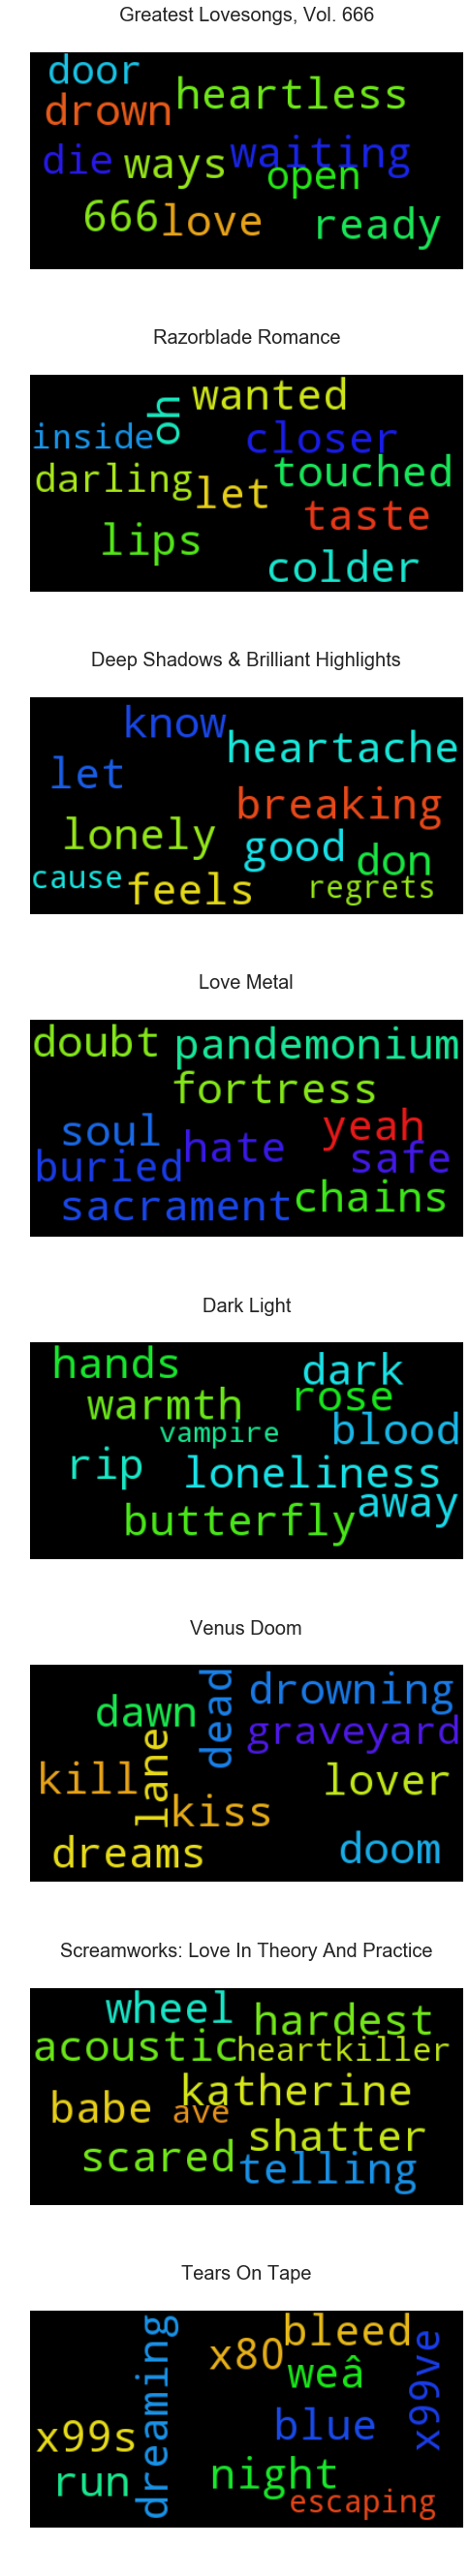

In [96]:
# visualized it by word clouds

Albums = df['Album'].unique()
fig, ax = plt.subplots(len(Albums), sharex=True, figsize=(8,6*len(Albums)))

for i, album in enumerate(Albums) :
    d, acc, acc_d = generate_text(album)
    wordcloud = WordCloud(max_font_size=40).fit_words(d.items())
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title(f'{album }', fontsize = 20)
    ax[i].axis("off")
